# 5장(함수)-프로그래밍 실습

## 5-1. 함수의 정의

In [1]:
def two_times(x):
    return x*2

A = {1,2,3,4,5}
B = set()
for i in A:
    B.add(two_times(i))
print(B)

{2, 4, 6, 8, 10}


### [예제 5-1]  함수의 정의1
- 함수 판별: AxB의 부분집합인지 확인
- 정의역, 치역, 공변역 확인

In [42]:
# 방법1: f가 AxB의 부분집합인지 확인
def isFunction(A, B, f):
    import itertools
    AxB = set(itertools.product(A, B))

    is_func = True
    for r in f:
        if r not in AxB:
            is_func = False
            break
    return is_func


# 방법2: f의 원소(x,y)가 (A, B)에 속하는지 + 정의역의 개수
def isFunction(A, B, f):
    is_func = True
    domainCnt= dict()   # 정의역의 대응 개수를 딕셔너리형태로 만듦
    
    # 함수 여부 체크
    for r in f:
        x, y = r[0], r[1]        
        if x not in A: is_func = False
        if y not in B: is_func = False
        
        # 정의역 개수 세기
        if x not in domainCnt: domainCnt[x] = 1
        else: domainCnt[x] += 1     
        # 함수 체크(X가 여러 개의 Y와 연결되어 있는지 확인)
        if domainCnt[x] > 1: is_func = False 
    
    return is_func


A = {1, 2, 3, 4}
B = {'a','b','c','d'}
f = {(1,'a'), (2,'a'), (3,'d'), (4,'c')}

if isFunction(A, B, f):
    print(f'f는 함수다.')
    print(f'f의 정의역 Dom(f)={A}')
    print(f'f의 공변역 coDom(f)={B}') 
    print(f'f의 치역 Ran(f)={ set(r[1] for r in f)}')       
else:
    print(f'f는 함수가 아니다.')

f는 함수다.
f의 정의역 Dom(f)={1, 2, 3, 4}
f의 공변역 coDom(f)={'a', 'c', 'b', 'd'}
f의 치역 Ran(f)={'c', 'd', 'a'}


### [예제 5-2]  함수의 정의2

In [43]:
def func(x):
    return x**2
    
A = {-1, 0, 1}
B = A
f = { ( a, int(func(a)) ) for a in A }

print(f)
if isFunction(A, B, f):
    print(f'f는 함수다.')
    print(f'f의 정의역 Dom(f)={A}')
    print(f'f의 치역 Ran(f)={ set(r[1] for r in f)}')       
else:
    print(f'f는 함수가 아니다.')

{(-1, 1), (1, 1), (0, 0)}
f는 함수다.
f의 정의역 Dom(f)={0, 1, -1}
f의 치역 Ran(f)={0, 1}


### 프로그램 함수
- 내장함수 : https://docs.python.org/ko/3.10/library/functions.html 
- 사용자 정의 함수 : 사용자가 필요에 의해 직접 정의한 함수

### [실습] 사용자 정의함수 : 커피 자판기 사용자 함수 만들기

In [ ]:
def coffeeMachine(coffee1, coffee2, coffee3):

    total = coffee1*2500 + coffee2*3000 + coffee3*3000
    print("지불할 총 금액은 ", total, "원 입니다")

    money, change = 0, 0
    while True:
        print('-'*30)
        money = int(input(f'[지불할 금액:{total}] : 돈을 넣어주세요: '))

        change = money - total
        if change < 0:
            print("입력한 금액이 부족합니다. ", change*-1, "원을 더 넣어주세요.")
            total = total - money
        else:
            print("거스름돈은 ", change, "원 입니다")
            break
       
        

menu = '''[커피 자동주문 머신 메뉴]
------------------------------
-아메리카노는 2500원
-카레라떼는 3000원
-카푸치노는 3000원
입니다. 원하시는 커피종류와 잔수를 입력하세요.
------------------------------'''
print(menu)
coffee1 = int(input("아메리카노 몇잔?: "))
coffee2 = int(input("카페라떼 몇잔?: "))
coffee3 = int(input("카푸치노 몇잔?: "))

coffeeMachine(coffee1, coffee2, coffee3)

### 함수 그래프 (Function Graph)
- 그래프 그리기: https://www.desmos.com/calculator?lang=ko 
- 파이썬 matplotlib 라이브러리 설치하기
- matplotlib 선그래프 참고: https://matplotlib.org/stable/plot_types/basic/plot.html

In [ ]:
!pip install matplotlib

### [실습] $y=f(x)=x^2$ 그래프 그리기

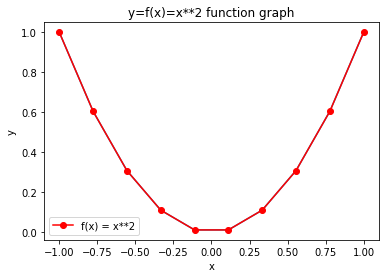

In [34]:

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

x = np.linspace(-1, 1, 10)
y = f(x)
plt.plot(x, y)

# ‘ro-’는 빨간색 (‘red’)의 원형 (‘o’) 마커와 실선(‘-’)를 의미
plt.plot(x, y, color='red', marker='o', label="f(x) = x**2")   
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=f(x)=x**2 function graph")
plt.legend()

plt.show()

------------------------------

## 5-2. 단사, 전사, 전단사 함수

### [예제 5-4] 단사, 전사, 전단사 함수 판별하기

In [50]:
# 함수 형태 판별하기
def isfuncion(A, B, f):
    print(f'A={A}\nB={B}\nf={f}')

    is_func = True     # 함수
    is_injective = True  # 단사함수 
    is_surjective= True  # 전사함수   
    
    domainCnt= dict()   # 정의역의 대응 개수를 딕셔너리형태로 만듦
    rangeCnt = dict()   # 치역의 대응 개수를 딕셔너리형태로 만듦
    
    for r in f:
        x = r[0]
        y = r[1]
        # 함수 여부 체크
        if x not in A: is_func = False
        if y not in B: is_func = False
        
        # 정의역 개수 세기
        if x not in domainCnt: domainCnt[x] = 1
        else: domainCnt[x] += 1     
        # 함수 체크(X가 여러 개의 Y와 연결되어 있는지 확인)
        if domainCnt[x] > 1: is_func = False     
        
        # 치역 개수 세기
        if y not in rangeCnt: rangeCnt[y] = 1
        else: rangeCnt[y] += 1  
        # 단사함수 체크(치역이 여러 개 인지 확인)
        if rangeCnt[y] > 1: is_injective = False 
    
#     print(f'정의역 개수: {len(A)}/{domainCnt}')
#     print(f'치역 개수: {len(B)}/{rangeCnt}')

    # 함수 여부
    if is_func == False:
        print(f'{f}는 함수가 아니다.')
            
    # 단사 함수 여부
    if len(A) != len(domainCnt):
        is_injective = False
    
    # 전사 함수 여부
    if len(B) != len(rangeCnt):
        is_surjective = False
        
    # 전단사 함수 여부
    if (is_surjective == True) and (is_injective == True):
        print('f는 전단사 함수이다')
    elif (is_surjective == False) and (is_injective == False):
        print('f는 단사 함수도, 전사 함수도 아니다')
    elif is_injective == True:
        print('f는 단사 함수이다')
    elif is_surjective == True:
        print('f는 전사 함수이다')

        
#----------------------
# 함수 형태 판별하기
#----------------------
A = {'a1','a2','a3'}
B = {'b1','b2','b3'}
C = {'c1','c2'}
D = {'d1','d2','d3','d4'}

f1 = {('a1','b2'),('a2','b3'),('a3','b1')}
f2 = {('a1','d2'),('a2','d1'),('a3','d4')}
f3 = {('b1','c2'),('b2','c2'),('b3','c1')}
f4 = {('a1','b1'),('a2','b1'),('a3','b3')}        
        
isfuncion(A, B, f1)
print('-'*30)
isfuncion(A, D, f2)
print('-'*30)
isfuncion(B, C, f3)
print('-'*30)
isfuncion(A, B, f4)    
       

A={'a1', 'a2', 'a3'}
B={'b2', 'b3', 'b1'}
f={('a3', 'b1'), ('a1', 'b2'), ('a2', 'b3')}
f는 전단사 함수이다
------------------------------
A={'a1', 'a2', 'a3'}
B={'d1', 'd3', 'd4', 'd2'}
f={('a1', 'd2'), ('a3', 'd4'), ('a2', 'd1')}
f는 단사 함수이다
------------------------------
A={'b2', 'b3', 'b1'}
B={'c2', 'c1'}
f={('b3', 'c1'), ('b1', 'c2'), ('b2', 'c2')}
f는 전사 함수이다
------------------------------
A={'a1', 'a2', 'a3'}
B={'b2', 'b3', 'b1'}
f={('a1', 'b1'), ('a3', 'b3'), ('a2', 'b1')}
f는 단사 함수도, 전사 함수도 아니다


- 각 기능별로 함수화 하여 사용한다.

In [49]:
# 함수 판별
def isFunction(A, B, f):
    print(f'A={A}\nB={B}\nf={f}')
    is_func = True
    domainCnt= dict()   # 정의역의 대응 개수를 딕셔너리형태로 만듦
    
    # 함수 여부 체크
    for r in f:
        x, y = r[0], r[1]        
        if x not in A: is_func = False
        if y not in B: is_func = False
        
        # 정의역 개수 세기
        if x not in domainCnt: domainCnt[x] = 1
        else: domainCnt[x] += 1     
        # 함수 체크(X가 여러 개의 Y와 연결되어 있는지 확인)
        if domainCnt[x] > 1: is_func = False 
    
    return is_func


# 단사함수 형태 판별하기
def isInjective(A, B, f):
    is_injective = True  # 단사함수 
    domainCnt= dict()   # 정의역의 대응 개수를 딕셔너리형태로 만듦
    rangeCnt = dict()   # 치역의 대응 개수를 딕셔너리형태로 만듦
    
    for r in f:
        x, y = r[0], r[1]
        
        # 정의역 개수 세기
        if x not in domainCnt: domainCnt[x] = 1
        else: domainCnt[x] += 1     
        
        # 치역 개수 세기
        if y not in rangeCnt: rangeCnt[y] = 1
        else: rangeCnt[y] += 1  
            
        # 단사함수 여부 체크(치역이 여러 개 인지 확인)
        if rangeCnt[y] > 1: 
            is_injective = False 
            
    # 단사함수 여부 체크(집합 A의 개수와 정의역의 개수가 같은지 확인 
    if len(A) != len(domainCnt):
        is_injective = False

    return is_injective


# 전사함수 형태 판별하기
def isSurjective(A, B, f):
    is_surjective= True  # 전사함수
    domainCnt= dict()   # 정의역의 대응 개수를 딕셔너리형태로 만듦
    rangeCnt = dict()   # 치역의 대응 개수를 딕셔너리형태로 만듦
    
    for r in f:
        y = r[1]
        # 치역 개수 세기
        if y not in rangeCnt: rangeCnt[y] = 1
        else: rangeCnt[y] += 1  
            
    # 전사 함수 여부
    if len(B) != len(rangeCnt):
        is_surjective = False
        
    return is_surjective


def checkFunctionType(A, B, f):    
    
    if isFunction(A, B, f):
        if isSurjective(A, B, f) and isInjective(A, B, f):
            print('f는 전단사 함수이다')
        elif isSurjective(A, B, f)==False and isInjective(A, B, f)==False:
            print('f는 단사 함수도, 전사 함수도 아니다')
        elif isInjective(A, B, f):
            print('f는 단사 함수이다')
        elif isSurjective(A, B, f):
            print('f는 전사 함수이다')
    else:
        print('f는 함수가 아닙니다.')

        
#----------------------
# 함수 형태 판별하기
#----------------------
A = {'a1','a2','a3'}
B = {'b1','b2','b3'}
C = {'c1','c2'}
D = {'d1','d2','d3','d4'}

f1 = {('a1','b2'),('a2','b3'),('a3','b1')}
f2 = {('a1','d2'),('a2','d1'),('a3','d4')}
f3 = {('b1','c2'),('b2','c2'),('b3','c1')}
f4 = {('a1','b1'),('a2','b1'),('a3','b3')}        
        
    
checkFunctionType(A, B, f1)
print('-'*30)
checkFunctionType(A, D, f2)
print('-'*30)
checkFunctionType(B, C, f3)
print('-'*30)
checkFunctionType(A, B, f4)

A={'a1', 'a2', 'a3'}
B={'b2', 'b3', 'b1'}
f={('a3', 'b1'), ('a1', 'b2'), ('a2', 'b3')}
f는 전단사 함수이다
------------------------------
A={'a1', 'a2', 'a3'}
B={'d1', 'd3', 'd4', 'd2'}
f={('a1', 'd2'), ('a3', 'd4'), ('a2', 'd1')}
f는 단사 함수이다
------------------------------
A={'b2', 'b3', 'b1'}
B={'c2', 'c1'}
f={('b3', 'c1'), ('b1', 'c2'), ('b2', 'c2')}
f는 전사 함수이다
------------------------------
A={'a1', 'a2', 'a3'}
B={'b2', 'b3', 'b1'}
f={('a1', 'b1'), ('a3', 'b3'), ('a2', 'b1')}
f는 단사 함수도, 전사 함수도 아니다


### [부교제 예제6-11] 단사함수 판별하기

In [54]:
A={1,2,3}
B={1,2,3,4,5}
f={(1,1),(2,3),(3,4)}
g={(1,1),(2,3),(3,3)}

if isFunction(A, B, f):
    if isInjective(A, B, f):
        print('f는 단사함수이다')
    else:
        print('f는 단사함수가 아니다')
print('-'*30)        
if isFunction(A, B, g):
    if isInjective(A, B, g):
        print('g는 단사함수이다')
    else:
        print('g는 단사함수가 아니다')

A={1, 2, 3}
B={1, 2, 3, 4, 5}
f={(2, 3), (1, 1), (3, 4)}
f는 단사함수이다
------------------------------
A={1, 2, 3}
B={1, 2, 3, 4, 5}
f={(2, 3), (1, 1), (3, 3)}
g는 단사함수가 아니다


### 함수의 개수와 조건 (A에서  B 로 가는 함수)
|A|= m, |B| = n  
- 함수의 개수: $m^n$
- 단사 함수의 조건과 개수: $m>=n, mPn=$ $m!\over(m-n)!$
- 전사 함수의 조건과 개수: $n >= m, nPm + nCm$ x $m^{n-m}$
- 전단사 함수의 조건과 개수: $n = m$, $n!$

#### 순열(Permutations)
- 반복 가능한 객체(=길이가 n인)에 대해서 중복을 허용하지 않고 r개를 뽑아서 나열한다.
- 뽑힌 순서대로 나열하기 때문에 순서가 의미 있다. (즉, 같은 값이 뽑히더라도 순서가 다르면 다른 경우의 수로 취급한다.)
- permutations(반복 가능한 객체, r) --> 객체에서 r개를 추출

In [51]:
from itertools import permutations

for i in permutations([1,2,3,4], 2):
    print(i, end=" ")

(1, 2) (1, 3) (1, 4) (2, 1) (2, 3) (2, 4) (3, 1) (3, 2) (3, 4) (4, 1) (4, 2) (4, 3) 

#### 조합(Ccombinations)
- 반복 가능한 객체(=길이가 n인)에 대해서 중복을 허용하지 않고 r개를 뽑는다.
- 순서 의미 없다.
- combinations(반복 가능한 객체, r)

In [52]:
from itertools import combinations

for i in combinations([1,2,3,4], 2):
    print(i, end=" ")

(1, 2) (1, 3) (1, 4) (2, 3) (2, 4) (3, 4) 

--------------------------------

## 5-3. 역함수와 합성 함수

### 역함수(inverse function) : 전단사 함수 일때 정의됨
- 함수  f의 역함수는  $ f^{-1}$ : $y=f(x)$, $x=f^{-1}(y)$  
- f가 전단사 함수이면 $f^{-1}$도 전단사함수이고,  $(f^{-1})^{-1} = f$이다

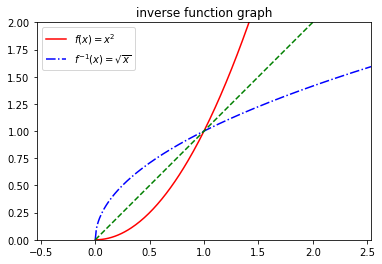

In [55]:
def f1(x):
    return x ** 2


def f1inv(x):
    return np.sqrt(x)


x = np.linspace(0, 3, 300)
plt.plot(x, f1(x), "r-", label="$f(x) = x^2$")
plt.plot(x, f1inv(x), "b-.", label="$f^{-1}(x) = \sqrt{x}$")
plt.plot(x, x, "g--")
plt.axis("equal")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title("inverse function graph")
plt.show()

### [예제5-5] 역함수의 존재
- A에서 B로의 관계 f가 존재할 때
- f의 역관계($f^{-1} = g$)가  B에서 A로의 함수인지 확인 

In [56]:
A = {1, 2, 3, 4}
B = {'a','b','c','d'}
f = {(1,'a'), (2,'a'), (3,'d'), (4,'c')}

# f의 역관계 g 만들기
g = {(r[1], r[0]) for r in f}  # f 

# g가 B에서 A로의 함수인지 확인한다.
# 앞에서 정의한 isFunction함수를 사용한다.
if isFunction(B, A, g) :
    print('f는 역함수가 존재한다.')
else:
    print('f는 역함수가 존재하지 않는다.')

A={'a', 'c', 'b', 'd'}
B={1, 2, 3, 4}
f={('a', 2), ('a', 1), ('c', 4), ('d', 3)}
f는 역함수가 존재하지 않는다.


### 합성 함수(composition function)
- 함수 $f, g가 f:X  \to Y, g: Y  \to Z$라 할 때  집합 $X에서 집합 Z$로의 함수를  $f와 g$의 합성 함수라고 하고,  $g \circ f $로 나타낸다.  

### [실습]: $f(x) = 2x, g(x) = x^2$,  --> g(f(x))를 구하는 예제

In [57]:
import numpy as np

def linear(x):
    return 2*x

def square(x):
    return np.power(x, 2)

def comp_func(list_func, x):
    f1 = list_func[0]
    f2 = list_func[1]
    return f2(f1(x))

func_list = [linear, square]

print(comp_func(func_list, 2))

16


------------------------------------

## 5-4. 특수 함수

### [예제 5-8] 같은 함수인지 판별하기

In [60]:
import numpy as np 

A = B = {-1, 0, 1}

def f(x):
    return np.power(x, 2)

def g(x):
    return np.power(x, 4)

f1 = {f(x) for x in A}
g1 = {g(x) for x in A}
print(f'f1:{f1}, g1:{g1}')
if f1 == g1:
    print('f1와 g1는 같은 함수이다.')
else:
    print('f1와 g1는 같은 함수가 아니다.')    

f1:{0, 1}, g1:{0, 1}
f1와 g1는 같은 함수이다.


### 천장 함수(ceiling function) & 바닥 함수(floor function)
-  ceil: 실수 𝑥에 대해서 𝑥보다 크거나 같은 정수 중에서 가장 작은 정수를 지정하는 함수
- floor: 실수 𝑥에 대해서 𝑥보다 작거나 같은 정수 중에서 가장 큰 정수를 지정하는 함수

In [61]:
import math

print( math.ceil(3.5) )
print( math.floor(3.5) )

print(round(4.5))
print(round(3.5))

4
3
4
4


In [62]:
import math

print( math.ceil(2.51) )
print( math.floor(2.51) )
print( math.ceil(-2.51) )
print( math.floor(-2.51) )

3
2
-2
-3


### 해시 함수(hash function)
- 해시 함수는 임의의 길이를 가진 자료를 고정된 길이를 가진 자료로 변환시킴으로써 자료를 빨리 찾을 수 있도록 하는 함수

### [예제 5-15] 해시 함수

In [65]:
def h(x):
    return x % 10

print( h(46) )
print( h(251) )
print( h(3256) )

6
1
6


### [예제 5-16] 해시 함수의 응용

In [67]:
def h(x):
    return x % 101

print( h(2473871) )
print( h(280) )

78
78


### [실습] 해시 알고리즘 구현하기
- 크기가 8인 해시 테이블

#### 1. 해시 테이블 만들기(딕셔너리 구조 이용 )

In [100]:
# 크기가 8인 해시 테이블 만들기
hash_table = list([0 for i in range(8)]) 
        
def hash_function(key): 
    return key % 8 

def insert(key, value): 
    index_key = hash(key)
    hash_addr = hash_function(index_key) 
    hash_table[hash_addr] = value
    print(hash_table)

def read(key): 
    index_key = hash(key)
    hash_addr = hash_function(index_key) 
    return hash_table[hash_addr] 

# key는 0부터 시작한다.(0~7)
insert(1, 'a')          # key(1), value('a') 추가
insert('name', 'cho')   # key('name'), value('a') 추가
insert(2, 'b')          # key(2), value('b') 추가
insert(7, 'd')          # key(7), value('d') 추가
print(f'key(2)-->value:{read(2)}')          # key(2) 읽기

# 키 값 충돌 발생
insert(15, 'kim')        # key(15), value(kim') 추가

[0, 'a', 0, 0, 0, 0, 0, 0]
[0, 'a', 0, 0, 0, 'cho', 0, 0]
[0, 'a', 'b', 0, 0, 'cho', 0, 0]
[0, 'a', 'b', 0, 0, 'cho', 0, 'd']
key(2)-->value:b
[0, 'a', 'b', 0, 0, 'cho', 0, 'kim']


- 클래스로 구현함

In [94]:
class HashTable: 
    def __init__(self): 
        self.hash_table = list([0 for i in range(8)]) 
        
    def hash_function(self, key): 
        return key % 8 
    
    def insert(self, data, value): 
        index_key = hash(data)
        hash_addr = self.hash_function(index_key) 
        self.hash_table[hash_addr] = value 
        
    def read(self, data): 
        index_key = hash(data)
        hash_addr = self.hash_function(index_key) 
        return self.hash_table[hash_addr] 
    
    def print(self): 
        print(self.hash_table)


In [101]:
ht = HashTable()

ht.insert(1, 'a')          # key값(1), value('a') 추가
ht.print()
ht.insert('name', 'cho')   # key값('name'), value('a') 추가
ht.print()
ht.insert(2, 'b')          # key값(2), value('b') 추가
ht.print()
ht.insert(7, 'd')          # key값(7), value('d') 추가
ht.print()
print(ht.read(2))


# 키 값 충돌 발생
ht.insert(15, 'kim')          # key값(15), value('kim') 추가
ht.print()

[0, 'a', 0, 0, 0, 0, 0, 0]
[0, 'a', 0, 0, 0, 'cho', 0, 0]
[0, 'a', 'b', 0, 0, 'cho', 0, 0]
[0, 'a', 'b', 0, 0, 'cho', 0, 'd']
b
[0, 'a', 'b', 0, 0, 'cho', 0, 'kim']


#### 2. 충돌 해결하기 : Chaining
linked list로 데이터를 추가로 뒤에 연결시키는 방법

In [104]:
class HashTable: 
    def __init__(self): 
        self.hash_table = list([0 for i in range(8)]) 
        
    def hash_function(self, key): 
        return key % 8 
    
    def insert(self, key, value): 
        index_key = hash(key)
        hash_addr = self.hash_function(index_key) 
        
        #Linked list형태로 만듦
        if self.hash_table[hash_addr] != 0: # 값이 이미 존재하면
            for index in range(len(self.hash_table[hash_addr])):
                if self.hash_table[hash_addr][index][0] == index_key:
                    self.hash_table[hash_addr][index][1] = value
                    return
            self.hash_table[hash_addr].append([index_key, value]) 
        else: 
            self.hash_table[hash_addr] = [[index_key, value]] 
        
    def read(self, key):
        index_key = hash(key)
        hash_addr = self.hash_function(index_key)
        
        if self.hash_table[hash_addr] != 0:
            for i in range(len(self.hash_table[hash_addr])): 
                if self.hash_table[hash_addr][i][0] == index_key: 
                    # 키와 동일할 경우 -> 해당 value return 
                    return self.hash_table[hash_addr][i][1]

            return None
        else:
            return None
    
    def print(self): 
        print(self.hash_table)     


In [105]:
ht = HashTable()

ht.insert(1, 'a')
ht.print()
ht.insert('name', 'cho')
ht.print()
ht.insert(2, 'b')
ht.print()
ht.insert(7, 'd')
ht.print()
ht.insert(15, 'kim')
ht.print()

[0, [[1, 'a']], 0, 0, 0, 0, 0, 0]
[0, [[1, 'a']], 0, 0, 0, [[-7183154567869627123, 'cho']], 0, 0]
[0, [[1, 'a']], [[2, 'b']], 0, 0, [[-7183154567869627123, 'cho']], 0, 0]
[0, [[1, 'a']], [[2, 'b']], 0, 0, [[-7183154567869627123, 'cho']], 0, [[7, 'd']]]
[0, [[1, 'a']], [[2, 'b']], 0, 0, [[-7183154567869627123, 'cho']], 0, [[7, 'd'], [15, 'kim']]]


#### 문자열 해싱
 - SHA-1:   SHA-1은 해쉬값의 크기를 160으로 고정하는 알고리즘
 - SHA-256: SHA-256은 해쉬값의 크기를 256으로 고정하는 알고리즘

In [108]:
import hashlib  

def hash_sha1(data):
    hash_object = hashlib.sha1()  
    hash_object.update(data) 
    hex_dig = hash_object.hexdigest() 
    print(hex_dig) 

def hash_sha256(data):
    hash_object = hashlib.sha256()
    hash_object.update(data) 
    hex_dig = hash_object.hexdigest() 
    print(hex_dig) 

test1 = 'test'.encode()
test2 = 'hello world'.encode()
hash_sha1( test1 )
hash_sha1( test2 )
hash_sha256( test1 )
hash_sha256( test2 )

a94a8fe5ccb19ba61c4c0873d391e987982fbbd3
2aae6c35c94fcfb415dbe95f408b9ce91ee846ed
9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08
b94d27b9934d3e08a52e52d7da7dabfac484efe37a5380ee9088f7ace2efcde9


---------------------------------------------

## 5-5. 응용 : 순열

### 순열(Permutations)
- 참고: https://docs.python.org/ko/3/library/itertools.html
- 반복 가능한 객체(=길이가 n인)에 대해서 중복을 허용하지 않고 r개를 뽑아서 나열한다.
- 뽑힌 순서대로 나열하기 때문에 순서가 의미 있다. (즉, 같은 값이 뽑히더라도 순서가 다르면 다른 경우의 수로 취급한다.)
- permutations(반복 가능한 객체, r) --> 객체에서 r개를 추출

### [예제 5-18] 순열 표현하기

In [127]:
from itertools import permutations

A = ['1','2','3']
P = permutations([1,2,3])
print( list(P) )

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


In [128]:
A = ['1','2','3']
print( list(map(''.join, permutations(A))) )

['123', '132', '213', '231', '312', '321']


### 순열 곱(product) : 두 개의 순열에 대한 합성

### [예제 5-19] : 순열 곱 계산하기

In [157]:
import numpy as np

A = [1,2,3] 

# 관계 행렬 만들기
def makeRelationMatrix(A, B):    
    datas = []
    for a in A:
        data = []
        for b in A:
            r = (a, b) 
            if r in B: data.append(1)
            else: data.append(0)
        datas.append(data)
        
    return np.array(datas)


# 부울곱을 이용한 Matrix 출력
def getBooleanProductMatrix(matrix):
    R2 = list()
    r, c = matrix.shape
    for i in range(r):
        for j in range(c):
            if matrix[i][j]==1:
                R2.append((A[i],A[j])) 
    return R2


def makeProduct(A, R1, R2):
    M1 = makeRelationMatrix(A, R1)
    M2 = makeRelationMatrix(A, R2)
    matrix = M1 @ M2
    print(f'matrix:\n {matrix}')
    
    # 합성 관계를 부울곱으로 계산한 결과
    R_S = getBooleanProductMatrix(matrix) 
    return R_S

# 순서 출렬을 위해 리스트로 표현함
P2 = [(1,2),(2,1),(3,3)]
P3 = [(1,2),(2,3),(3,1)]
print( makeProduct(A, P2, P3) )
print('-'*30)
P4 = [(1,3),(2,1),(3,2)]
P5 = [(1,3),(2,2),(3,1)]
print( makeProduct(A, P4, P5) )


matrix:
 [[0 0 1]
 [0 1 0]
 [1 0 0]]
[(1, 3), (2, 2), (3, 1)]
------------------------------
matrix:
 [[1 0 0]
 [0 0 1]
 [0 1 0]]
[(1, 1), (2, 3), (3, 2)]


#### 연습문제: 26-a

In [145]:
A = [1,2,3,4,5,6]  
R1 = [(1,3),(2,4),(3,1),(4,2),(5,6),(6,5)]
R2 = [(1,6),(2,3),(3,2),(4,5),(5,4),(6,1)]

print( makeProduct(A, R1, R2) )
print('-'*30)

matrix:
 [[0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]]
[(1, 2), (2, 5), (3, 6), (4, 3), (5, 1), (6, 4)]
------------------------------


#### 연습문제: 27-a

In [146]:
A = [1,2,3,4,5,6,7,8]  
R1 = [(1,3),(2,1),(3,2),(4,4),(5,5),(6,6),(7,7),(8,8)]
R2 = [(1,1),(2,2),(3,5),(4,4),(5,7),(6,6),(7,8),(8,3)]

print( makeProduct(A, R1, R2) )
print('-'*30)

matrix:
 [[0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]]
[(1, 5), (2, 1), (3, 2), (4, 4), (5, 7), (6, 6), (7, 8), (8, 3)]
------------------------------


### [예제 5-20] 순환적 순열 표기

In [158]:
def cycleNotation(A, C):
    L = []
    for a in list(A):
        if a in C:
            if C.index(a) == len(C)-1: # 순환적순열의 마지막 요소
                L.append( (a,C[0]) )
            else:
                L.append( (a,C[C.index(a)+1]) )
        else:
            L.append( (a,a) )
    return L


A = {1,2,3,4,5}
cycle = (1,3,5)
print( cycleNotation(A, cycle) )   

cycle = (3,5,1)
print( cycleNotation(A, cycle) ) 

cycle = (5,1,3)
print( cycleNotation(A, cycle) ) 

[(1, 3), (2, 2), (3, 5), (4, 4), (5, 1)]
[(1, 3), (2, 2), (3, 5), (4, 4), (5, 1)]
[(1, 3), (2, 2), (3, 5), (4, 4), (5, 1)]


### [예제 5-21] 순환적 순열의 곱

In [161]:
A = [1,2,3,4,5,6]
cycle = (4,1,3,5)
R1 = cycleNotation(A, cycle)

cycle = (5,6,3)
R2 = cycleNotation(A, cycle)

print( makeProduct(A, R1, R2) )
print('-'*30)

print( makeProduct(A, R2, R1) )
print('-'*30)

matrix:
 [[0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]
[(1, 5), (2, 2), (3, 6), (4, 1), (5, 4), (6, 3)]
------------------------------
matrix:
 [[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]]
[(1, 3), (2, 2), (3, 4), (4, 1), (5, 6), (6, 5)]
------------------------------


-------------------------

THE END